In [19]:
# matplotlib 버전 upgrade
!pip install matplotlib -U
import matplotlib as mpl
mpl.__version__

Requirement already up-to-date: matplotlib in /usr/local/lib/python3.7/dist-packages (3.4.2)


'3.4.2'

In [20]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# 한글 사용
plt.rc('font', family='NanumBarunGothic') 

In [22]:
# 월평균 주가

# 월
m2020 = ['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12']

# 삼성전자 월평균 주가
sec = [58842, 58988, 50357, 49086, 49086, 52968, 54828, 57170, 58176, 59787, 63255, 73343]

# 카카오 월평균 주가
kakao = [32640, 35182, 31920, 33615, 45613, 52834, 64459, 74602, 75905, 71392, 72355, 75260]

# LG전자 월평균 주가
lge = [68860, 65820, 52949, 52748, 56216, 65089, 70857, 84090, 89524, 90789, 87202, 99738]

# 현대자동차 월평균 주가
hdm = [119700, 128012,  91800,  93258,  94808, 103291, 111326, 158588, 176226, 173697, 176762, 189095]

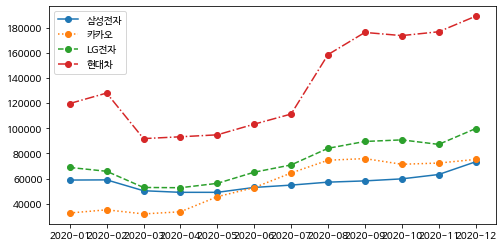

In [23]:
fig, ax = plt.subplots(figsize = (8, 4))

ax.plot(m2020, sec, "o-",label = '삼성전자')
ax.plot(m2020, kakao, "o:", label="카카오")
ax.plot(m2020, lge, "o--", label="LG전자")
ax.plot(m2020, hdm, "o-.", label="현대차")
ax.legend()

In [24]:
# 수익률 비교
# 월별 평균 주가 연초 시초가로 나눔
# 넘파이를 사용하는 이유는 한번에 계산이 되기 때문
# -1하면 0이되기때문에 맨처음을 0으로 했을때 얼만큼올랐고 내렸는지 확인가능

sec_rate = np.array(sec)/sec[0] - 1 
kakao_rate = np.array(kakao)/kakao[0] - 1
lge_rate = np.array(lge)/lge[0] - 1
hdm_rate = np.array(hdm)/hdm[0] - 1

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


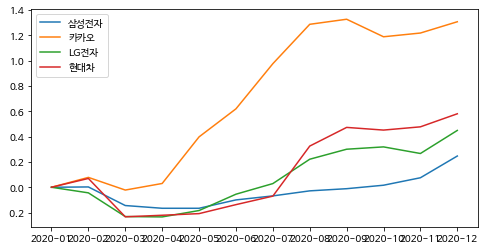

In [25]:
# 월별 평균 주가를 연초 시초가로 나눈후 -1을 통해 0을기준으로 변화량을 나타냄
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(m2020, sec_rate, label="삼성전자")
ax.plot(m2020, kakao_rate, label="카카오")
ax.plot(m2020, lge_rate, label="LG전자")
ax.plot(m2020, hdm_rate, label="현대차")
ax.legend()

(-0.5, 1.5)

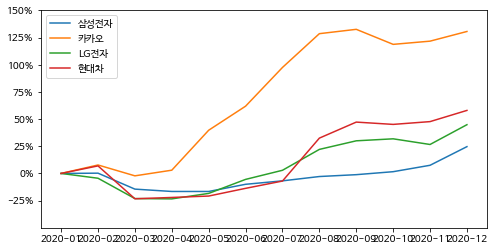

In [26]:
# 4. y축 눈금 정비, - 사라짐 문제 해결

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(m2020, sec_rate, label="삼성전자")
ax.plot(m2020, kakao_rate, label="카카오")
ax.plot(m2020, lge_rate, label="LG전자")
ax.plot(m2020, hdm_rate, label="현대차")
ax.legend()

yticks = np.arange(-0.25, 1.75, 0.25)
ax.set_yticks(yticks)
ax.set_yticklabels([f"{y*100:.0f}%" for y in yticks])
ax.set_ylim(-0.5, )

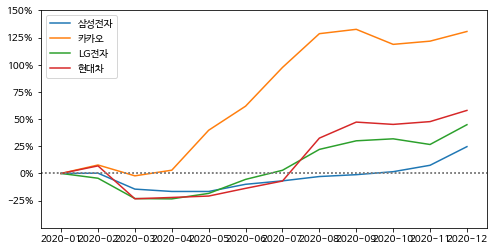

In [30]:
# 5. 손익이 잘 드러나게 변경

ax.axhline(y=0, c="gray", ls=":") # ls= linestyle
display(fig)#(쥬피터나 코렙에 화면에 그림을 띄우는 명령어)

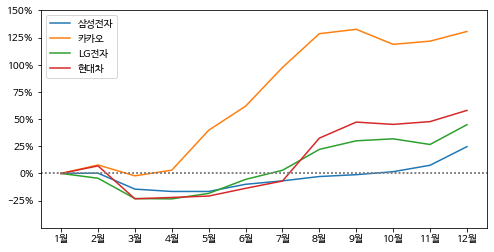

In [31]:
# 6. 가로축을 깔끔하게 변경

xticklabels = [f"{i}월" for i in range(1, 13)]
ax.set_xticks(range(0, 12))
ax.set_xticklabels(xticklabels)
display(fig)

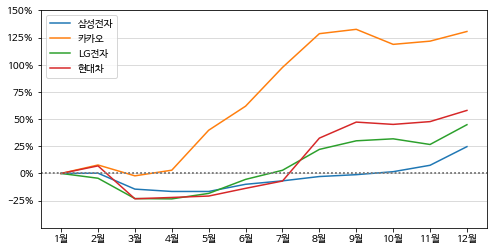

In [32]:
# 7. y축 grid 추가

ax.grid(axis="y", c="lightgray")
display(fig)

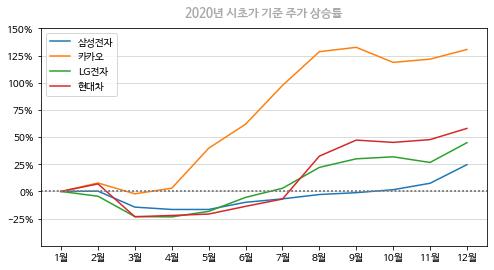

In [33]:
# 8. title 추가

ax.set_title("2020년 시초가 기준 주가 상승률", 
             fontweight="bold", fontsize="large", color="darkgray", pad=12)# pad는 타이틀과 그림사이의 거리
display(fig)

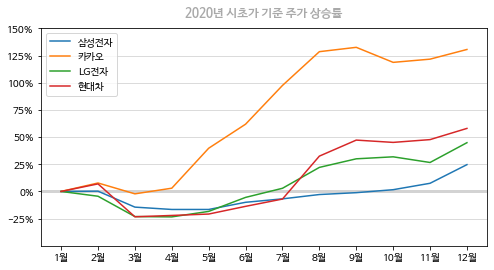

In [36]:
# 전체 코드 정리

fig, ax = plt.subplots(figsize=(8, 4)) # 객체지향 방식 적용

ax.plot(m2020, sec_rate, label="삼성전자")  # line plot
ax.plot(m2020, kakao_rate, label="카카오")
ax.plot(m2020, lge_rate, label="LG전자")
ax.plot(m2020, hdm_rate, label="현대차")

xticks = [f"{i}월" for i in range(1, 13)] # x축 눈금
ax.set_xticks(list(range(12)))
ax.set_xticklabels(xticks)

yticks = np.arange(-0.25, 1.75, 0.25)  # y축 눈금
ax.set_yticks(yticks)
ax.set_yticklabels([f"{y*100:.0f}%" for y in yticks])
ax.set_ylim(-0.5, )

ax.grid(axis="y", c="lightgray") # 배경 눈금
ax.axhline(y=0, c="lightgray", lw=3, zorder=0)  # 주가 상승, 하락 기준점 *
#lw = linewidth, zorder은 포토샵에서 레이어같은느낌 1이 맨앞
ax.set_title("2020년 시초가 기준 주가 상승률",  # title
             fontweight="bold", fontsize="large", color="darkgray", pad=12)

ax.legend()